In [1]:
!pip install xgboost shap utils


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Imports
import pandas as pd

import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import plot_importance

import shap
shap.initjs()

import sys
sys.path.append('../')
import utils

C:\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/refs/heads/main/insurance.csv")

print("Number of rows: {}".format(len(data)))
data.head(10)

Number of rows: 1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
#Feature engineering
data['sex'] = [1 if s =='male' else 0 for s in data['sex']]
data['smoker'] = [1 if s =='yes' else 0 for s in data['smoker']]

data['region.SW'] = [1 if r =='southwest' else 0 for r in data['region']]
data['region.SE'] = [1 if r =='southeast' else 0 for r in data['region']]
data['region.NW'] = [1 if r =='northwest' else 0 for r in data['region']]
data['region.NE'] = [1 if r =='northeast' else 0 for r in data['region']]

data = data.drop('region', axis=1)

data.head(10)

,age,sex,bmi,children,smoker,charges,region.SW,region.SE,region.NW,region.NE
0,19,0,27.900,0,1,16884.92400,1,0,0,0
1,18,1,33.770,1,0,1725.55230,0,1,0,0
2,28,1,33.000,3,0,4449.46200,0,1,0,0
3,33,1,22.705,0,0,21984.47061,0,0,1,0
4,32,1,28.880,0,0,3866.85520,0,0,1,0
5,31,0,25.740,0,0,3756.62160,0,1,0,0
6,46,0,33.440,1,0,8240.58960,0,1,0,0
7,37,0,27.740,3,0,7281.50560,0,0,1,0
8,37,1,29.830,2,0,6406.41070,0,0,0,1
9,60,0,25.840,0,0,28923.13692,0,0,1,0


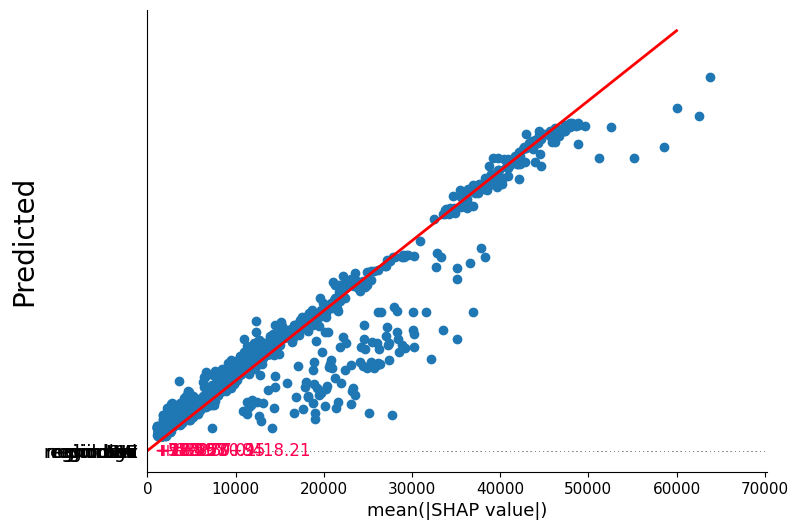

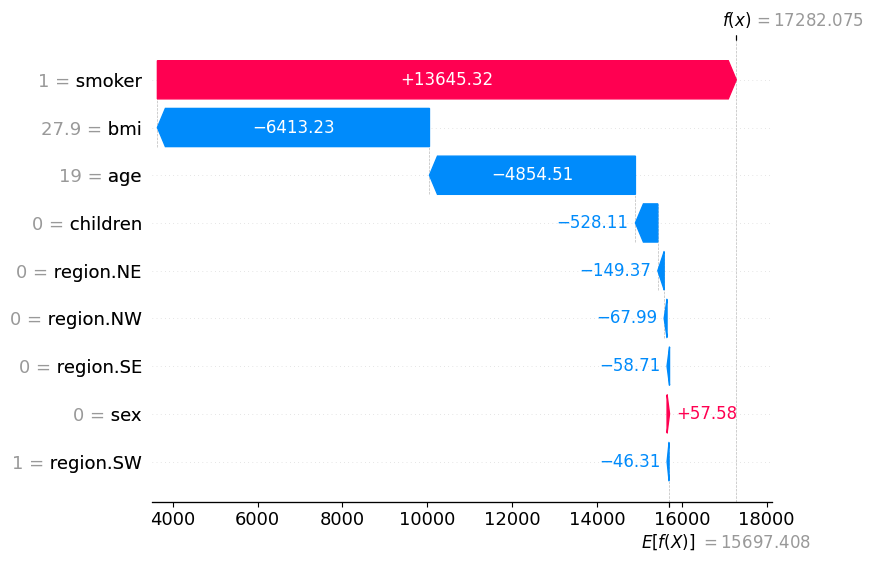

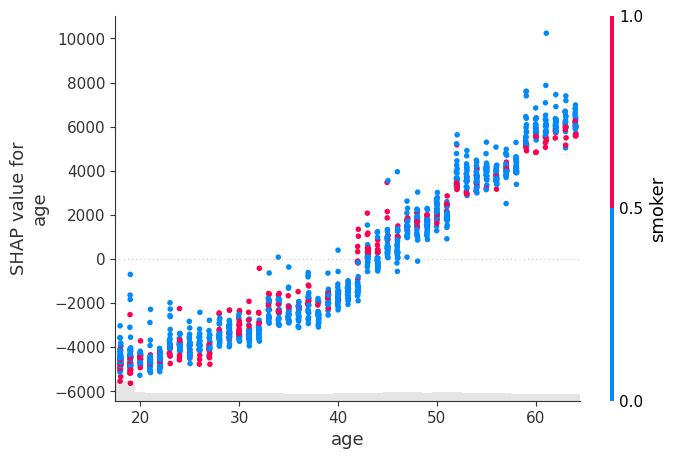

In [5]:
y = data['charges']
X = data.drop('charges', axis=1)

#Train model
model = xgb.XGBRegressor(objective="reg:squarederror"
                         ,n_estimators=10) 
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)

#Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
plt.plot([0, 60000], [0, 60000], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

# Interpretación del modelo usando SHAP
shap.initjs()  # Inicializa JS para visualizar gráficos interactivos en Jupyter Notebook

# Crea un explainer SHAP para el modelo
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Gráfica de importancia de características (bar plot)
shap.plots.bar(shap_values, max_display=10)

# Gráfico waterfall para el primer ejemplo en el conjunto de datos
shap.plots.waterfall(shap_values[0])

# Gráfico scatter para una característica específica (ejemplo: 'age')
shap.plots.scatter(shap_values[:, "age"], color=shap_values)

plt.show()